# ___

# [ Machine Learning in Geosciences ]

### | Topic: **GeoAI: Spatial Sampling of ST_LUCAS vector data for Spatial Cross-validation** 

### | Thematic focus: land cover 

.....................................................................................................................

Author: *Lukas Brodsky* *lukas.brodsky@natur.cuni.cz* 

Project: ESF pro VŠ II na UK | Reg. číslo: CZ.02.2.69/0.0/0.0/18_056/0013322

---

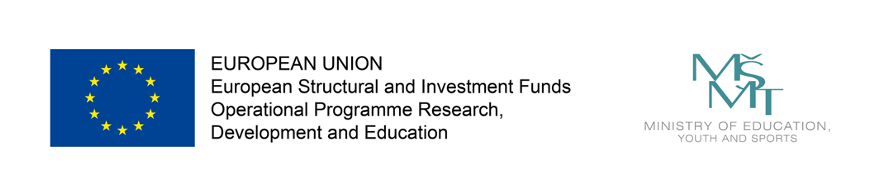

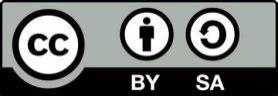

## Spatial Sampling 

using K-Means clusterring and random and spatial resampling (spatial-kfold Python package). 

    1. Spatial clustering with KMeans
    2. Spatial Blocks
        2.1 Spatial resampled random blocks     
        2.2 Continuous spatial resampled blocks
    3. Plotting function 

In [ ]:
# spatial k-fold package 
# !pip install spatial-kfold

In [ ]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from spatialkfold.blocks import spatial_blocks 
from spatialkfold.datasets import load_ames
from spatialkfold.clusters import spatial_kfold_clusters 
from spatialkfold.plotting import spatial_kfold_plot
from spatialkfold.stats import spatial_kfold_stats

In [ ]:
os.listdir()

In [ ]:
# Load ST_LUCAS data
# https://drive.google.com/file/d/13FoS6gVEf-jo2CmeyLrpT5-TG7yx5qlv/view?usp=drive_link

path = './data'
lucas_fn = os.path.join(path, 'cz_lucas_points_2018.gpkg')
lucas = gpd.read_file(lucas_fn)

In [ ]:
lucas.head(5)

In [ ]:
lucas.plot(markersize=1)

In [ ]:
lucas.crs

## 1. Spatial clustering with KMeans

In [ ]:
# 1. Spatial cluster resampling 
lucas_clusters = spatial_kfold_clusters(gdf=lucas, name='point_id', nfolds=10, 
                                       algorithm='kmeans', random_state=42) 


In [ ]:
lucas_clusters.head(3)

In [ ]:
# Plot with colors 
cols_tab = cm.get_cmap('tab20', 10)
cols = [cols_tab(i) for i in range(10)]
color_ramp = ListedColormap(cols)

In [ ]:
# Plot 
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 
lucas_clusters.plot(column='folds', ax=ax, cmap= color_ramp, markersize = 2, legend=True)
ax.set_title('Spatially Clustered Folds')
plt.show()

In [ ]:
# check the number of train and test of the dependent variable for each fold
# lc1 attribute .. LUCAS Land Cover classification 
lucas_clusters_stats = spatial_kfold_stats(X=lucas_clusters, y= lucas_clusters.lc1, 
                                          groups = lucas_clusters.folds)

In [ ]:
lucas_clusters_stats

## 2. Spatial Blocks

### 2.1 spatial resampled random blocks  

In [ ]:
# create 10 random blocks 
lucas_rnd_blocks = spatial_blocks(gdf=lucas, width=25000, height=25000, 
                                 method='random', nfolds=10, 
                                 random_state=42)

In [ ]:
lucas_rnd_blocks.head()

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

lucas_rnd_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
lucas.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Random Blocks Folds')

In [ ]:
# Resample the data with the prepared blocks 

In [ ]:
lucas_res_rnd_blk = gpd.overlay(lucas, lucas_rnd_blocks)

In [ ]:
lucas_res_rnd_blk.head(3)

In [ ]:
# plot the resampled blocks
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

lucas_rnd_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
lucas_res_rnd_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 3)
ax.set_title('Spatially Resampled\nRandom Blocks')

In [ ]:

lucas_res_rnd_blk_stats = spatial_kfold_stats(X=lucas_res_rnd_blk, y= lucas_res_rnd_blk.lc1, 
                                             groups = lucas_res_rnd_blk.folds)


In [ ]:
lucas_res_rnd_blk_stats

### 2.2 Continuous spatial resampled blocks
Two option are availble with orientation :

'tb-lr' : top-bottom, left-right

'bt-rl' : bottom-top, right-left

In [ ]:
lucas_cont_blocks = spatial_blocks(gdf=lucas, width=25000, height=25000, 
                                  method='continuous', orientation='tb-lr' ,
                                  nfolds=10, random_state=42)

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

lucas_cont_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
lucas.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Continuous Blocks Folds\norientation:"tb-lr"')

In [ ]:
# resample the ames data with the prepared blocks 
lucas_res_cont_blk = gpd.overlay(lucas, lucas_cont_blocks)

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

lucas_cont_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
lucas_res_cont_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 2)
ax.set_title('Spatially Resampled\nContinuous Blocks Folds. "tb-lr"')
plt.show()

In [ ]:
lucas_res_cont_blk_stats = spatial_kfold_stats(X=lucas_res_cont_blk, y=lucas_res_cont_blk.lc1, 
                                              groups=lucas_res_cont_blk.folds)

In [ ]:
lucas_res_cont_blk_stats

## 3. Plotting function
Plot the partitioning of the data at each fold

In [ ]:
# check the folds number 
np.unique(lucas_clusters.folds.values)

In [ ]:
for i in range(1,11):
    fig, ax = plt.subplots(1,1 , figsize=(9, 4))

    spatial_kfold_plot(X=lucas_clusters, 
                       geometry=lucas_clusters.geometry, 
                       groups=lucas_clusters.folds, 
                       fold_num=i, cmap='viridis', ax=ax)    